In [1]:
%pylab inline

import pandas as pd

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.calibration import calibration_curve
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


# Task 1: Classify (Response Prediction)

Load simplified dataset with 4 continuous features (easy to run logistic regression with).

Note: features are genereated as follows
- avggift: average dollar amount of gifts to date
- lastgift: dollar amount of most recent gift
- ampergift: average amount of gift from included records
- pgift: d['NGIFTALL']/d['NUMPROM']

In [2]:
dtrn = pd.read_csv('Data/simple_model_response_train.csv')
dtst = pd.read_csv('Data/simple_model_response_test.csv')

In [3]:
dtrn.head()

,a,b,c,d,target
0,7.74,10.0,0.42,10.43,0
1,15.67,25.0,0.09,18.50,0
2,7.48,5.0,0.43,8.29,0
3,6.81,10.0,0.24,9.29,0
4,6.86,15.0,0.33,12.50,0


In [4]:
dtst.head()

,a,b,c,d,target
0,15.33,15.0,0.14,26.5,0
1,15.00,20.0,0.10,15.0,0
2,24.44,25.0,0.15,0.0,0
3,13.67,19.0,0.09,18.0,0
4,5.75,10.0,0.17,6.6,0


In [5]:
dtrn['target'].value_counts()

0    90569
1     4843
Name: target, dtype: int64

In [6]:
dtst['target'].value_counts()

0    91494
1     4873
Name: target, dtype: int64

In [7]:
trn_response_rate = dtrn['target'].astype(np.float).mean()
tst_response_rate = dtst['target'].astype(np.float).mean()
print(trn_response_rate)
print(tst_response_rate)

0.05075881440489666
0.05056710284641008


In [8]:
from sklearn.linear_model import LogisticRegression

x_cols = ['a', 'b', 'c', 'd']

m = LogisticRegression()
m.fit(dtrn[x_cols].values, dtrn['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## ROC AUC (on train data set)

AUC = 0.5925


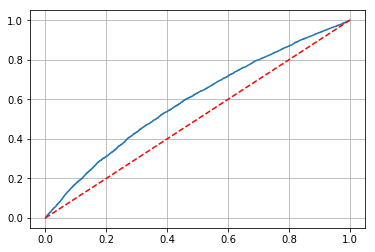

In [9]:
pred = m.predict_proba(dtrn[x_cols].values)[:,1]
target = dtrn['target'].values

fpr, tpr, _ = roc_curve(y_true=target, y_score=pred)
plot(fpr, tpr)
plot([0, 1], [0, 1], 'r--')
grid()
print('AUC = {:.4f}'.format(auc(fpr, tpr)))

## Probability Calibration (on train data set)

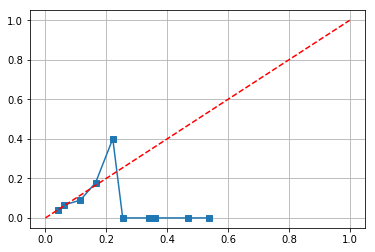

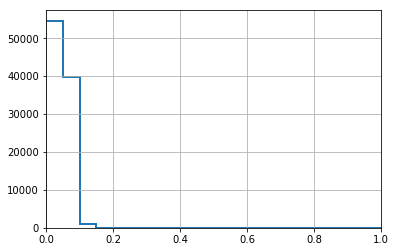

In [10]:
pred = m.predict_proba(dtrn[x_cols].values)[:,1]
target = dtrn['target'].values

prob_true, prob_pred = calibration_curve(y_true=target.astype(np.int), y_prob=pred, n_bins=20)
figure()
plot(prob_pred, prob_true, 's-')
plot([0, 1], [0, 1], 'r--')
grid()
figure()
hist(pred, range=(0, 1), bins=20, histtype="step", lw=2)
grid()
xlim((0, 1))
show()

## ROC AUC (on test data set)

AUC = 0.5934


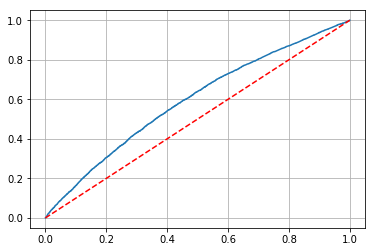

In [11]:
pred = m.predict_proba(dtst[x_cols].values)[:,1]
target = dtst['target'].values

fpr, tpr, _ = roc_curve(y_true=target, y_score=pred)
plot(fpr, tpr)
plot([0, 1], [0, 1], 'r--')
grid()
print('AUC = {:.4f}'.format(auc(fpr, tpr)))

## Probability Calibration (on test data set)

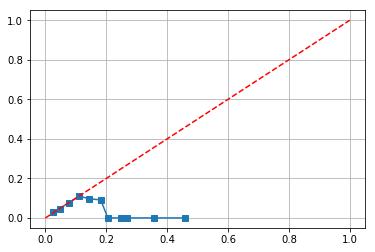

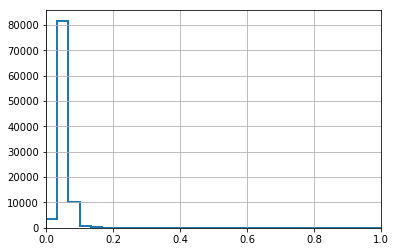

In [12]:
pred = m.predict_proba(dtst[x_cols].values)[:,1]
target = dtst['target'].values

prob_true, prob_pred = calibration_curve(y_true=target.astype(np.int), y_prob=pred, n_bins=30)
figure()
plot(prob_pred, prob_true, 's-')
plot([0, 1], [0, 1], 'r--')
grid()
figure()
hist(pred, range=(0, 1), bins=30, histtype="step", lw=2)
grid()
xlim((0, 1))
show()

In [13]:
# Save the result for Taks 3
pred_response_prob = pred

# Task 2: Donation Amount Prediction

In [14]:
dtrn = pd.read_csv('Data/simple_model_amount_train.csv')
dtst = pd.read_csv('Data/simple_model_amount_test.csv')

In [15]:
dtrn.head()

,a,b,c,d,target
0,4.07,5.0,0.23,4.60,4.0
1,6.18,7.0,0.46,7.25,7.0
2,4.86,5.0,0.28,5.20,5.0
3,11.00,10.0,0.20,13.80,13.0
4,9.40,12.0,0.22,10.60,10.0


In [16]:
dtst.head()

,a,b,c,d,target
0,15.33,15.0,0.14,26.5,0.0
1,15.00,20.0,0.10,15.0,0.0
2,24.44,25.0,0.15,0.0,0.0
3,13.67,19.0,0.09,18.0,0.0
4,5.75,10.0,0.17,6.6,0.0


In [17]:
dtrn.shape

(4843, 5)

In [18]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(dtrn[x_cols].values, dtrn['target'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## R-squared

### On train dataset

In [19]:
pred = m.predict(dtrn[x_cols].values)
target = dtrn['target'].values

print('R-squared: {:.3f}'.format(r2_score(y_true=target, y_pred=pred)))

R-squared: 0.548


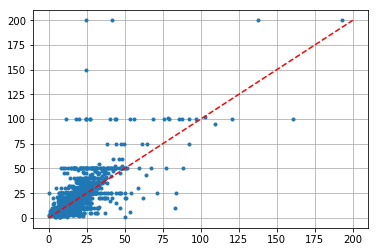

In [20]:
plot(pred, target, '.')
grid()
y_max = max(pred.max(), target.max())
plot([0, y_max], [0, y_max], 'r--')

### On test dataset

In [21]:
idx = dtst['target'] > 0
pred = m.predict(dtst.loc[idx, x_cols].values)
target = dtst.loc[idx, 'target'].values

print('R-squared: {:.3f}'.format(r2_score(y_true=target, y_pred=pred)))

R-squared: 0.668


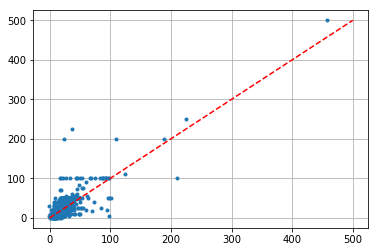

In [22]:
plot(pred, target, '.')
grid()
y_max = max(pred.max(), target.max())
plot([0, y_max], [0, y_max], 'r--')

In [23]:
# save the results for Task 3
pred_amount = m.predict(dtst[x_cols].values)
actual_donation = dtst['target']

# Task 3: Mirror Decision Process

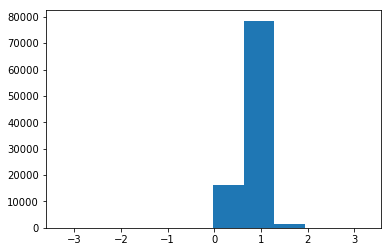

In [24]:
expected_donation = pred_amount * pred_response_prob
hist(expected_donation)
show()

In [25]:
cost_per_mail = 0.68
idx = expected_donation > cost_per_mail
print('Total net donation: {:.2f}'.format(np.sum(actual_donation[idx] - cost_per_mail)))

Total net donation: 11509.77


In [26]:
print('Total net donation (mail every one): {:.2f}'.format(np.sum(actual_donation - cost_per_mail)))

Total net donation (mail every one): 10560.08


### Probability of Donation vs. Amount of Donation

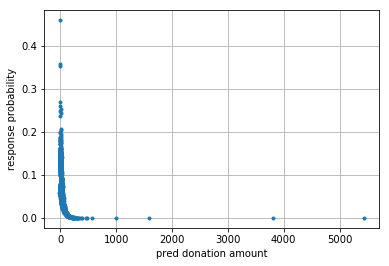

In [27]:
plot(pred_amount, pred_response_prob, '.')
xlabel('pred donation amount')
ylabel('response probability')
grid()

Use log scale on donation amount:

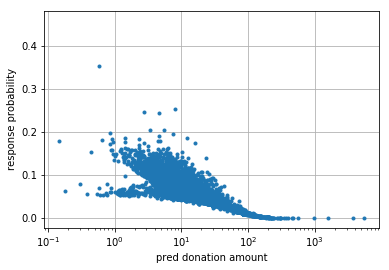

In [28]:
plot(pred_amount, pred_response_prob, '.')
xlabel('pred donation amount')
ylabel('response probability')
xscale('log')
grid()